# Análisis del Mercado de Bienes Raíces en Gran Santiago (2004-2020)

En este estudio, se llevará a cabo un análisis detallado del mercado de bienes raíces en la zona de Gran Santiago, en Chile, durante el período comprendido entre 2004 y 2020.

Este análisis se basa en datos de stock, ventas y la duración en meses para distintos tipos de propiedades, como departamentos, casas y viviendas, con el objetivo de proporcionar una visión completa de la evolución de este mercado a lo largo de los años.

A continuación una descripción de los nombres de las columnas y lo que representan.

**Stock:** unidades de viviendas nuevas (departamentos o casas) disponibles para venta en cada momento del tiempo.

**Ventas:** promesas de compraventa de viviendas nuevas firmadas en cada momento del tiempo.
						
**Meses:** medida de la velocidad de ventas que se calcula como el cociente entre el stock disponible en un mes concreto y las unidades vendidas en ese mismo mes. Representa el número de meses necesarios para vender todo el stock disponible asumiendo que el ritmo de ventas se mantendrá estable y no habrá ingreso de nuevas unidades.									

In [144]:
# IMPORTANDO BIBLIOTECAS NECESARIAS PARA EL PROYECTO
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [145]:
# LEEMOS CON PANDAS LOS DATOS EN EL EXCEL Y LOS IMPRIMIMOS EN UN DATAFRAME
df = pd.read_excel('GranSantiagoMercadoWeb.xls')
print(df.head())

  MERCADO GRAN SANTIAGO Unnamed: 1 Departamentos Unnamed: 3 Unnamed: 4  Casas  \
0                   NaN        NaN         Stock     Ventas      Meses  Stock   
1                  2004        Ene         22001        960  22.917708   9068   
2                   NaN        Feb         21434        841  25.486326   8447   
3                   NaN        Mar         20593       1193  17.261526   7761   
4                   NaN        Abr         20866       1282  16.276131   7370   

  Unnamed: 6 Unnamed: 7 Viviendas Unnamed: 9 Unnamed: 10  
0     Ventas      Meses     Stock     Ventas       Meses  
1        540  16.792593     31069       1500   20.712667  
2        556  15.192446     29881       1397   21.389406  
3        788   9.848985     28354       1981   14.312973  
4        754   9.774536     28236       2036   13.868369  


Eliminaremos las columnas de 'Casas' y 'Viviendas' para especificarnos en los precios de los Departamentos


In [146]:
# LISTA DE ÍNDICES DE LAS RESPECTIVAS COLUMNAS A ELIMINAR
column_indices_to_remove = [5, 6, 7, 8, 9, 10]

# ELIMINANDO COLUMNAS 
df = df.drop(df.columns[column_indices_to_remove], axis=1)

# IMPRIMIENDO DATAFRAME
print(df.head())

  MERCADO GRAN SANTIAGO Unnamed: 1 Departamentos Unnamed: 3 Unnamed: 4
0                   NaN        NaN         Stock     Ventas      Meses
1                  2004        Ene         22001        960  22.917708
2                   NaN        Feb         21434        841  25.486326
3                   NaN        Mar         20593       1193  17.261526
4                   NaN        Abr         20866       1282  16.276131


In [147]:
# CAMBIANDO LOS NOMBRES DE LAS COLUMNAS PARA MEJOR ENTENDIMIENTO
df = df.rename(columns={'MERCADO GRAN SANTIAGO': 'AAA', 'Unnamed: 1': 'MMM', 'Departamentos': 'Stock', 'Unnamed: 3': 'Ventas', 'Unnamed: 4': 'Meses'})

# ELIMINANDO LA FILA 0 QUE CONTIENE TITULOS Y NO REPRESENTAN DATOS REALES
df = df.drop(df.index[0])

# IMPRIMIENDO DATAFRAME
print(df.head())

    AAA  MMM  Stock Ventas      Meses
1  2004  Ene  22001    960  22.917708
2   NaN  Feb  21434    841  25.486326
3   NaN  Mar  20593   1193  17.261526
4   NaN  Abr  20866   1282  16.276131
5   NaN  May  23294   1588  14.668766


In [148]:
# LLENAMOS LOS VALORES NAN DE LAS COLUMNAS CON LOS VALORES ANTERIORES 
df['AAA'] = df['AAA'].ffill()
df['MMM'] = df['MMM'].ffill()
df['Stock'] = df['Stock'].ffill()
df['Ventas'] = df['Ventas'].ffill()
df['Meses'] = df['Meses'].ffill()

# IMPRIMIENDO DATAFRAME
print(df.head(15))


     AAA  MMM  Stock  Ventas      Meses
1   2004  Ene  22001     960  22.917708
2   2004  Feb  21434     841  25.486326
3   2004  Mar  20593    1193  17.261526
4   2004  Abr  20866    1282  16.276131
5   2004  May  23294    1588  14.668766
6   2004  Jun  21591    1540  14.020130
7   2004  Jul  22443    1775  12.643944
8   2004  Ago  20841    1741  11.970706
9   2004  Sep  21970    1471  14.935418
10  2004  Oct  22088    1356  16.289086
11  2004  Nov  24387    1037  23.516876
12  2004  Dic  19918     939  21.211928
13  2005  Ene  19354     899  21.528365
14  2005  Feb  21826     990  22.046465
15  2005  Mar  21213    1007  21.065541


In [149]:

# VERIFICAMOS LOS ULTIMOS VALORES
print(df.tail(15))


        AAA                                                MMM  \
227    2022                                                Nov   
228    2022                                                Dic   
229    2023                                                Ene   
230    2023                                                Feb   
231    2023                                                Mar   
232    2023                                                Abr   
233    2023                                                May   
234    2023                                                Jun   
235    2023                                                Jun   
236  FUENTE  Gerencia de Estudios , Cámara Chilena de la Co...   
237  FUENTE  Gerencia de Estudios , Cámara Chilena de la Co...   
238  FUENTE  Gerencia de Estudios , Cámara Chilena de la Co...   
239  FUENTE  Gerencia de Estudios , Cámara Chilena de la Co...   
240  FUENTE  Gerencia de Estudios , Cámara Chilena de la Co...   
241  FUENT

In [150]:
# ELIMINAMOS LAS FILAS QUE NO CONTIENEN DATOS QUE NOS INTERESAN
df = df.drop(index=range(236, 242))
print(df.tail(15))


      AAA  MMM  Stock  Ventas      Meses
221  2022  May  57668    1667  34.593881
222  2022  Jun  56987    1483  38.426837
223  2022  Jul  57915    1782  32.500000
224  2022  Ago  57540    1456  39.519231
225  2022  Sep  58233    1333  43.685671
226  2022  Oct  60130    1686  35.664294
227  2022  Nov  59874    1718  34.850990
228  2022  Dic  59855    1741  34.379667
229  2023  Ene  60765    1326  45.825792
230  2023  Feb  60259    1423  42.346451
231  2023  Mar  59423    1852  32.085853
232  2023  Abr  62141    1939  32.047963
233  2023  May  62488    2211  28.262325
234  2023  Jun  62255    2402  25.917985
235  2023  Jun  62255    2402  25.917985


### COMBINANDO FILA 'AAA' Y 'MMM' EN FILA 'Fecha' PARA MEJORAR EL GRAFICO

In [151]:
# Diccionario de mapeo de nombres de mes a números de mes
meses = {
    'Ene': '01', 'Feb': '02', 'Mar': '03', 'Abr': '04', 'May': '05', 'Jun': '06',
    'Jul': '07', 'Ago': '08', 'Sep': '09', 'Oct': '10', 'Nov': '11', 'Dic': '12'
}

# Se crea una nueva columna 'Fecha' combinando 'AAA' y 'MMM' en el formato 'YYYY-MM'
df['Fecha'] = pd.to_datetime(df['AAA'].astype(str) + '-' + df['MMM'].map(meses), format='%Y-%m')

# Elimina las columnas 'AAA' y 'MMM'
df.drop(['AAA', 'MMM'], axis=1, inplace=True)

# Mueve la columna 'Fecha' al principio del DataFrame
fecha_column = df.pop('Fecha')
df.insert(0, 'Fecha', fecha_column)

# Convertir la columna 'Fecha' a formato DateTime 
df['Fecha'] = pd.to_datetime(df['Fecha'])


print(df.head(15))


        Fecha  Stock  Ventas      Meses
1  2004-01-01  22001     960  22.917708
2  2004-02-01  21434     841  25.486326
3  2004-03-01  20593    1193  17.261526
4  2004-04-01  20866    1282  16.276131
5  2004-05-01  23294    1588  14.668766
6  2004-06-01  21591    1540  14.020130
7  2004-07-01  22443    1775  12.643944
8  2004-08-01  20841    1741  11.970706
9  2004-09-01  21970    1471  14.935418
10 2004-10-01  22088    1356  16.289086
11 2004-11-01  24387    1037  23.516876
12 2004-12-01  19918     939  21.211928
13 2005-01-01  19354     899  21.528365
14 2005-02-01  21826     990  22.046465
15 2005-03-01  21213    1007  21.065541


In [152]:
# IMPRIMIENDO LA INFORMACION GENERAL PARA CORROBORAR LOS DATOS
print("Información del dataset:")
print(df.info())
print("\n\n")
print("Descripción del dataset:")
print(df.describe())

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 1 to 235
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   235 non-null    datetime64[ns]
 1   Stock   235 non-null    object        
 2   Ventas  235 non-null    int64         
 3   Meses   235 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 7.5+ KB
None



Descripción del dataset:
                               Fecha       Ventas       Meses
count                            235   235.000000  235.000000
mean   2013-09-30 17:46:12.765957376  1800.297872   23.458821
min              2004-01-01 00:00:00   505.000000   10.997609
25%              2008-11-16 00:00:00  1426.000000   17.327147
50%              2013-10-01 00:00:00  1757.000000   21.350471
75%              2018-08-16 12:00:00  2131.500000   26.613022
max              2023-06-01 00:00:00  3764.000000   84.3148

### CREACION DE GRAFICOS PARA MEJOR ENTENDIMIENTO CON MATPLOTLIB

**Stock:** unidades de viviendas nuevas (departamentos o casas) disponibles para venta en cada momento del tiempo.

**Ventas:** promesas de compraventa de viviendas nuevas firmadas en cada momento del tiempo.
						
**Meses:** medida de la velocidad de ventas que se calcula como el cociente entre el stock disponible en un mes concreto y las unidades vendidas en ese mismo mes. Representa el número de meses necesarios para vender todo el stock disponible asumiendo que el ritmo de ventas se mantendrá estable y no habrá ingreso de nuevas unidades.	

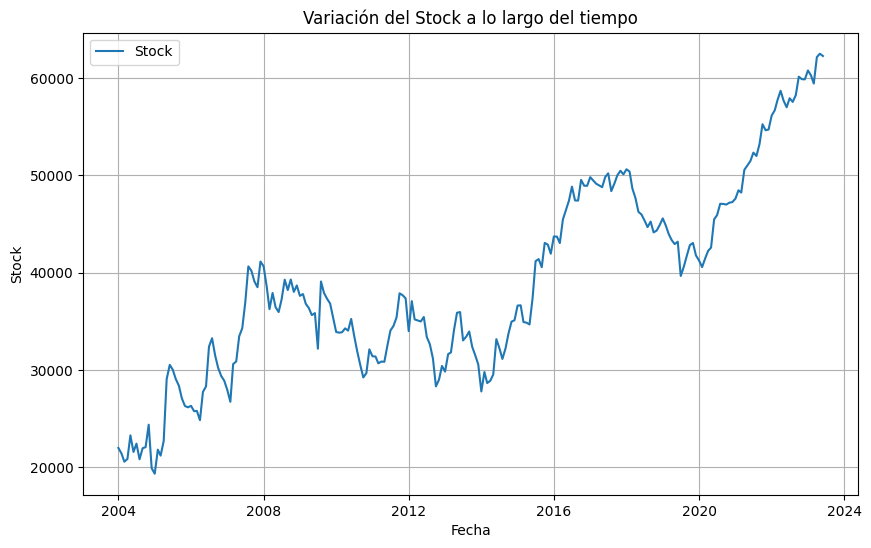

In [153]:
# Graficar 'Stock' y 'Meses' en un gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(df['Fecha'], df['Stock'], label='Stock')
plt.xlabel('Fecha')
plt.ylabel('Stock')
plt.title('Variación del Stock a lo largo del tiempo')
plt.legend()
plt.grid(True)
plt.show()

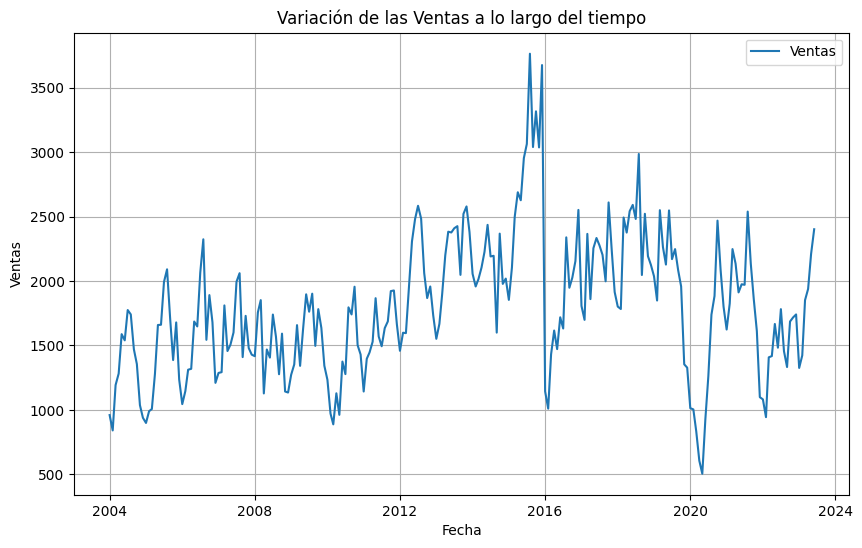

In [154]:
# Graficar 'Ventas' y 'Meses' en un gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(df['Fecha'], df['Ventas'], label='Ventas')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.title('Variación de las Ventas a lo largo del tiempo')
plt.legend()
plt.grid(True)
plt.show()

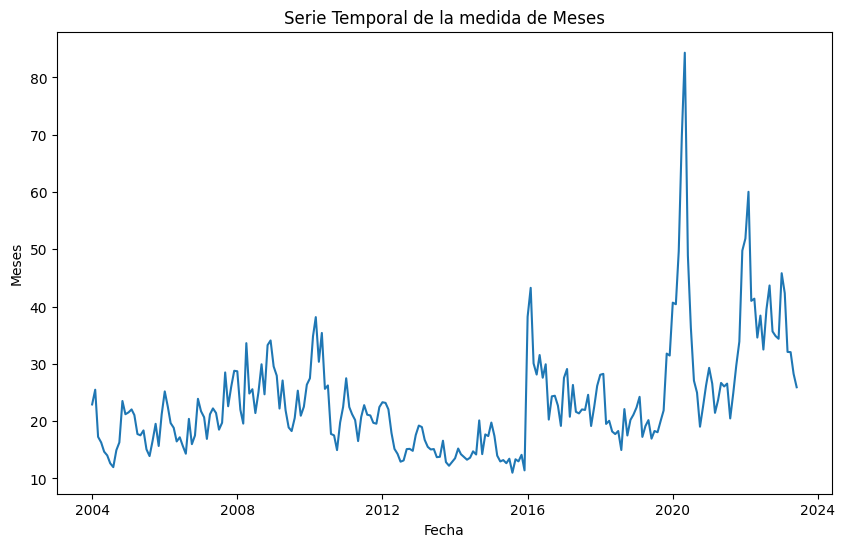

In [155]:
# Gráfico de la serie temporal de la medida de 'Meses'
plt.figure(figsize=(10, 6))
plt.plot(df['Fecha'],df['Meses'])
plt.xlabel('Fecha')
plt.ylabel('Meses')
plt.title('Serie Temporal de la medida de Meses')
plt.show()


# MACHINE LEARNING

In [156]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [158]:
df['Año'] = df['Fecha'].dt.year
df['Mes'] = df['Fecha'].dt.month
# Eliminar la columna 'Fecha' original
df = df.drop('Fecha', axis=1)


# Características (X): todas las columnas excepto 'Ventas'
X = df[['Fecha', 'Stock', 'Meses']]
# Variable a predecir (y): 'Ventas'
y = df['Ventas']

KeyError: "['Fecha'] not in index"

In [ ]:
# División del conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Inicializar y entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)


TypeError: float() argument must be a string or a real number, not 'Timestamp'

In [ ]:
# Predicciones en el conjunto de prueba
predictions = model.predict(X_test)

# Evaluar el modelo (por ejemplo, utilizando la métrica de error cuadrático medio)
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
print(f"Error cuadrático medio: {mse}")


TypeError: float() argument must be a string or a real number, not 'Timestamp'